## Navigation

#### Day 1

0. [Introduction](#intro)
1. [Import packages](#setup)
2. [Get the data](#data)
3. [Data exploration](#init_edit)
    - [Figure out new information](#new_info)
    - [Merge with other tables](#merge)
    - [Aggregate by day](#day_agg)
    - [Aggregate by week](#week_agg)
    
4. [Initial attempt at training](#train_first)
     - [Train](#leakage_train)
     - [Fix leakage](#fix_leakage)
     
5. [Feature engineering](#feature_engineering)

6. [Bring everything together](#bring_together)
     
   
7. [Final training](#model)
    - [Overfitting model](#overfit)
    - [Final model](#final_model)

# 1. Import packages and define functions <a class="anchor" id="setup"></a>

In [3]:
# !pip install jupyter_contrib_nbextensions
# !jupyter contrib nbextension install --user
# !jupyter nbextension enable codefolding/main

     |████████████████████████████████| 20.9MB 13.0MB/s eta 0:00:01
     |████████████████████████████████| 870kB 14.1MB/s eta 0:00:01
     |████████████████████████████████| 481kB 11.4MB/s eta 0:00:01
  Created wheel for jupyter-latex-envs: filename=jupyter_latex_envs-1.4.6-py2.py3-none-any.whl size=963395 sha256=3b75f3431cb998345adc99d260aebf9b5304c02e834a065cfcc43b3f72c0d1c8
  Stored in directory: /Users/misraturp/Library/Caches/pip/wheels/0d/71/2a/164491997299b9f2479a251e254323fe35d946779e18f27956
  Created wheel for jupyter-nbextensions-configurator: filename=jupyter_nbextensions_configurator-0.4.1-py2.py3-none-any.whl size=465823 sha256=4e2c3785718cc216e54ed0bfd49687f161b505ebbd6f0c6942873cbde71fd306
  Stored in directory: /Users/misraturp/Library/Caches/pip/wheels/15/df/fe/2a74fe34709e7fdc5ae153a768675d9fda93cc7d5133ed1fb0
Successfully built jupyter-latex-envs jupyter-nbextensions-configurator
[I 14:34:59 InstallContribNbextensionsApp] jupyter contrib nbextension install --user


[I 14:34:59 InstallContribNbextensionsApp] Copying: /opt/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/runtools/gutter.css -> /Users/misraturp/Library/Jupyter/nbextensions/runtools/gutter.css
[I 14:34:59 InstallContribNbextensionsApp] - Validating: OK
[I 14:34:59 InstallContribNbextensionsApp] Installing /opt/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/tree-filter -> tree-filter
[I 14:34:59 InstallContribNbextensionsApp] Making directory: /Users/misraturp/Library/Jupyter/nbextensions/tree-filter/
[I 14:34:59 InstallContribNbextensionsApp] Copying: /opt/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/tree-filter/tree-filter.yaml -> /Users/misraturp/Library/Jupyter/nbextensions/tree-filter/tree-filter.yaml
[I 14:34:59 InstallContribNbextensionsApp] Copying: /opt/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/tree-filter/index.js -> /Users/misraturp/Librar

[I 14:34:59 InstallContribNbextensionsApp] Copying: /opt/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/toc2/image.png -> /Users/misraturp/Library/Jupyter/nbextensions/toc2/image.png
[I 14:34:59 InstallContribNbextensionsApp] - Validating: OK
[I 14:34:59 InstallContribNbextensionsApp] Installing /opt/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/nbTranslate -> nbTranslate
[I 14:34:59 InstallContribNbextensionsApp] Making directory: /Users/misraturp/Library/Jupyter/nbextensions/nbTranslate/
[I 14:34:59 InstallContribNbextensionsApp] Copying: /opt/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/nbTranslate/nbTranslate.yaml -> /Users/misraturp/Library/Jupyter/nbextensions/nbTranslate/nbTranslate.yaml
[I 14:34:59 InstallContribNbextensionsApp] Copying: /opt/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/nbTranslate/nbTranslate.js -> /Users/misraturp/Library/Ju

[I 14:34:59 InstallContribNbextensionsApp] Copying: /opt/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/autoscroll/README.md -> /Users/misraturp/Library/Jupyter/nbextensions/autoscroll/README.md
[I 14:34:59 InstallContribNbextensionsApp] Copying: /opt/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/autoscroll/main.js -> /Users/misraturp/Library/Jupyter/nbextensions/autoscroll/main.js
[I 14:34:59 InstallContribNbextensionsApp] - Validating: OK
[I 14:34:59 InstallContribNbextensionsApp] Installing /opt/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/hide_input -> hide_input
[I 14:34:59 InstallContribNbextensionsApp] Making directory: /Users/misraturp/Library/Jupyter/nbextensions/hide_input/
[I 14:34:59 InstallContribNbextensionsApp] Copying: /opt/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/hide_input/icon.png -> /Users/misraturp/Library/Jupyter/nbextensions

[I 14:34:59 InstallContribNbextensionsApp] Copying: /opt/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/python-markdown/python-markdown.png -> /Users/misraturp/Library/Jupyter/nbextensions/python-markdown/python-markdown.png
[I 14:34:59 InstallContribNbextensionsApp] Copying: /opt/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/python-markdown/trusted.png -> /Users/misraturp/Library/Jupyter/nbextensions/python-markdown/trusted.png
[I 14:34:59 InstallContribNbextensionsApp] Copying: /opt/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/python-markdown/python-markdown.yaml -> /Users/misraturp/Library/Jupyter/nbextensions/python-markdown/python-markdown.yaml
[I 14:34:59 InstallContribNbextensionsApp] Copying: /opt/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/python-markdown/python-markdown-post.png -> /Users/misraturp/Library/Jupyter/nbextensions/python-markdo

[I 14:34:59 InstallContribNbextensionsApp] Copying: /opt/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/highlighter/demo_highlighter.html -> /Users/misraturp/Library/Jupyter/nbextensions/highlighter/demo_highlighter.html
[I 14:34:59 InstallContribNbextensionsApp] Copying: /opt/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/highlighter/demo_highlighter.ipynb -> /Users/misraturp/Library/Jupyter/nbextensions/highlighter/demo_highlighter.ipynb
[I 14:34:59 InstallContribNbextensionsApp] Copying: /opt/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/highlighter/tst_highlights.ipynb -> /Users/misraturp/Library/Jupyter/nbextensions/highlighter/tst_highlights.ipynb
[I 14:34:59 InstallContribNbextensionsApp] Copying: /opt/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/highlighter/export_highlights.ipynb -> /Users/misraturp/Library/Jupyter/nbextensions/highlighter/expo

[I 14:34:59 InstallContribNbextensionsApp] Making directory: /Users/misraturp/Library/Jupyter/nbextensions/load_tex_macros/
[I 14:34:59 InstallContribNbextensionsApp] Copying: /opt/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/load_tex_macros/load_tex_macros.yaml -> /Users/misraturp/Library/Jupyter/nbextensions/load_tex_macros/load_tex_macros.yaml
[I 14:34:59 InstallContribNbextensionsApp] Copying: /opt/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/load_tex_macros/icon.png -> /Users/misraturp/Library/Jupyter/nbextensions/load_tex_macros/icon.png
[I 14:34:59 InstallContribNbextensionsApp] Copying: /opt/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/load_tex_macros/readme.md -> /Users/misraturp/Library/Jupyter/nbextensions/load_tex_macros/readme.md
[I 14:34:59 InstallContribNbextensionsApp] Copying: /opt/anaconda3/lib/python3.7/site-packages/jupyter_contrib_nbextensions/nbextensions/load_

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import math
from random import randint
from sklearn import preprocessing

import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

pd.set_option('display.max_rows', 1000000)
pd.set_option('display.max_columns', 1000000)
matplotlib.rcParams.update({'font.size': 15})

def add_month_names(day):
    day_number = day%340
    if day_number<10:
        return 'February', 2
    elif day_number<40:
        return 'March', 3
    elif day_number<70:
        return 'April', 4
    elif day_number<100:
        return 'May', 5
    elif day_number<130:
        return 'June', 6
    elif day_number<160:
        return 'July', 7
    elif day_number<190:
        return 'August', 8
    elif day_number<220:
        return 'September', 9
    elif day_number<250:
        return 'October', 10
    elif day_number<280:
        return 'November', 11
    elif day_number<310:
        return 'December', 12
    elif day_number<340:
        return 'January', 1
    
def add_week_day_names(day):
    day_number = day%7
    if day_number==1:
        return 'Tuesday', day_number+1
    elif day_number==2:
        return 'Wednesday', day_number+1
    elif day_number==3:
        return 'Thursday', day_number+1
    elif day_number==4:
        return 'Friday', day_number+1
    elif day_number==5:
        return 'Saturday', day_number+1
    elif day_number==6:
        return 'Sunday', day_number+1
    elif day_number==0:
        return 'Monday', day_number+1
    
def get_season(month):
    if month == 'December' or month == 'January' or month == 'February':
        return 'winter'
    elif month == 'March' or month == 'April' or month == 'May':
        return 'spring'
    elif month == 'June' or month == 'July' or month == 'August':
        return 'summer'
    elif month == 'September' or month == 'October' or month == 'November':
        return 'fall'
    
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
   
def fill_nas_for_last_day(days_since_shopping):

    new_column = []
    days_since_column = days_since_shopping.tolist()
#     print(days_since_column)
#     print(len(days_since_column))
    
    next_day_since_value = 0
    
    for i in range(0,len(days_since_column)):
        num_weeks = 1
        value = days_since_column[i]
        
        if math.isnan(value):
            a = i+1
            if a<len(days_since_column):
                next_day_since_value = days_since_column[a]

                #get the next since value
                while math.isnan(next_day_since_value) and a<len(days_since_column)-1:
                    a = a+1
#                     print(a)
                    next_day_since_value = days_since_column[a]
                    num_weeks = num_weeks+1

                if next_day_since_value >= 7*num_weeks:
                    value = next_day_since_value-7*num_weeks

            new_column.append(value)
    #             print('number of weeks: ' + str(num_weeks))
    #             print('instead of nan: ' + str(value))
            
        else:
#             print('*****' + str(value))
            new_column.append(value)
    
    return pd.Series(new_column, index=days_since_shopping.index)

def fill_nas_for_spent_trip(amount_spent_last_trip):

    new_column = []
    amount_spent_last_trip_column = amount_spent_last_trip.tolist()
#     print(days_since_column)
#     print(len(days_since_column))
    
    for i in range(0,len(amount_spent_last_trip_column)):
        amount = amount_spent_last_trip_column[i]
        
        if i == 0:
            new_column.append(amount)
            last_spent = amount
        else:
            if math.isnan(amount):
                new_column.append(last_spent)
            else:
                new_column.append(amount)
                last_spent = amount
    
    return pd.Series(new_column, index=amount_spent_last_trip.index)

def fill_nas_for_last_week(weeks_since_shopping):

    new_column = []
    weeks_since_column = weeks_since_shopping.tolist()
#     print(weeks_since_column)
#     print(len(weeks_since_column))
    
    next_day_since_value = 0
    
    for i in range(0,len(weeks_since_column)):
        num_weeks = 1
        value = weeks_since_column[i]
        
        if math.isnan(value):
            a = i+1
            if a<len(weeks_since_column):
                next_day_since_value = weeks_since_column[a]

                #get the next since value
                while math.isnan(next_day_since_value) and a<len(weeks_since_column)-1:
                    a = a+1
#                     print(a)
                    next_day_since_value = weeks_since_column[a]
                    num_weeks = num_weeks+1

                if next_day_since_value >= num_weeks:
                    value = next_day_since_value-num_weeks

            new_column.append(value)
    #             print('number of weeks: ' + str(num_weeks))
    #             print('instead of nan: ' + str(value))
            
        else:
#             print('*****' + str(value))
            new_column.append(value)
    
    return pd.Series(new_column, index=weeks_since_shopping.index)

def fill_nas_for_prev_trip(stats_column):

    new_column = []
    stats_column_list = stats_column.tolist()
#     print(days_since_column)
#     print(len(days_since_column))
    
    for i in range(0,len(stats_column_list)):
        amount = stats_column_list[i]
        
        if i == 0:
            new_column.append(amount)
            last_spent = amount
        else:
            if math.isnan(amount):
                new_column.append(last_spent)
            else:
                new_column.append(amount)
                last_spent = amount
    
    return pd.Series(new_column, index=stats_column.index)

def fill_nas_for_weighted_avg(weighted_avg):

    new_column = []
    weighted_avg_column = weighted_avg.tolist()
#     print(days_since_column)
#     print(len(days_since_column))
    
    for i in range(0,len(weighted_avg_column)):
        amount = weighted_avg_column[i]
        
        if i == 0:
            new_column.append(amount)
            last_spent = amount
        else:
            if math.isnan(amount):
                new_column.append(last_spent)
            else:
                new_column.append(amount)
                last_spent = amount
    
    return pd.Series(new_column, index=weighted_avg.index)


# 2. Reading data <a class="anchor" id="data"></a>

In [9]:
df_transactions = pd.read_csv('data/transactions.csv')
df_demographics = pd.read_csv('data/demographics.csv')
df_products = pd.read_csv('data/products.csv')
# old_promotions = pd.read_csv('time_on_app.csv')
df_promotions = pd.read_csv('data/promotions.csv')
df_campaigns = pd.read_csv('data/campaigns.csv')

print('Data loading complete!')

Data loading complete!


# 3. Data exploration <a class="anchor" id="init_edit"></a>

In [23]:
df_transactions.sort_values(['WEEK_NO','HOUSEHOLD_KEY']).head()

,DAY,WEEK_NO,HOUSEHOLD_KEY,PRODUCT_ID,SALES_VALUE,QUANTITY,DISCOUNT
404,5,1,77,3598272088,7.99,1.0,0.00
405,5,1,77,4744896796,7.99,1.0,0.00
406,5,1,77,5591447946,2.71,4.0,-2.75
407,5,1,77,6781602629,3.38,2.0,0.00
0,1,1,98,782443249,0.39,1.0,0.00


In [43]:
# all_households_sorted = df_transactions.sort_values('HOUSEHOLD_KEY')[['HOUSEHOLD_KEY']].drop_duplicates()
# print(all_households_sorted.shape)
# all_households_sorted.head(10)

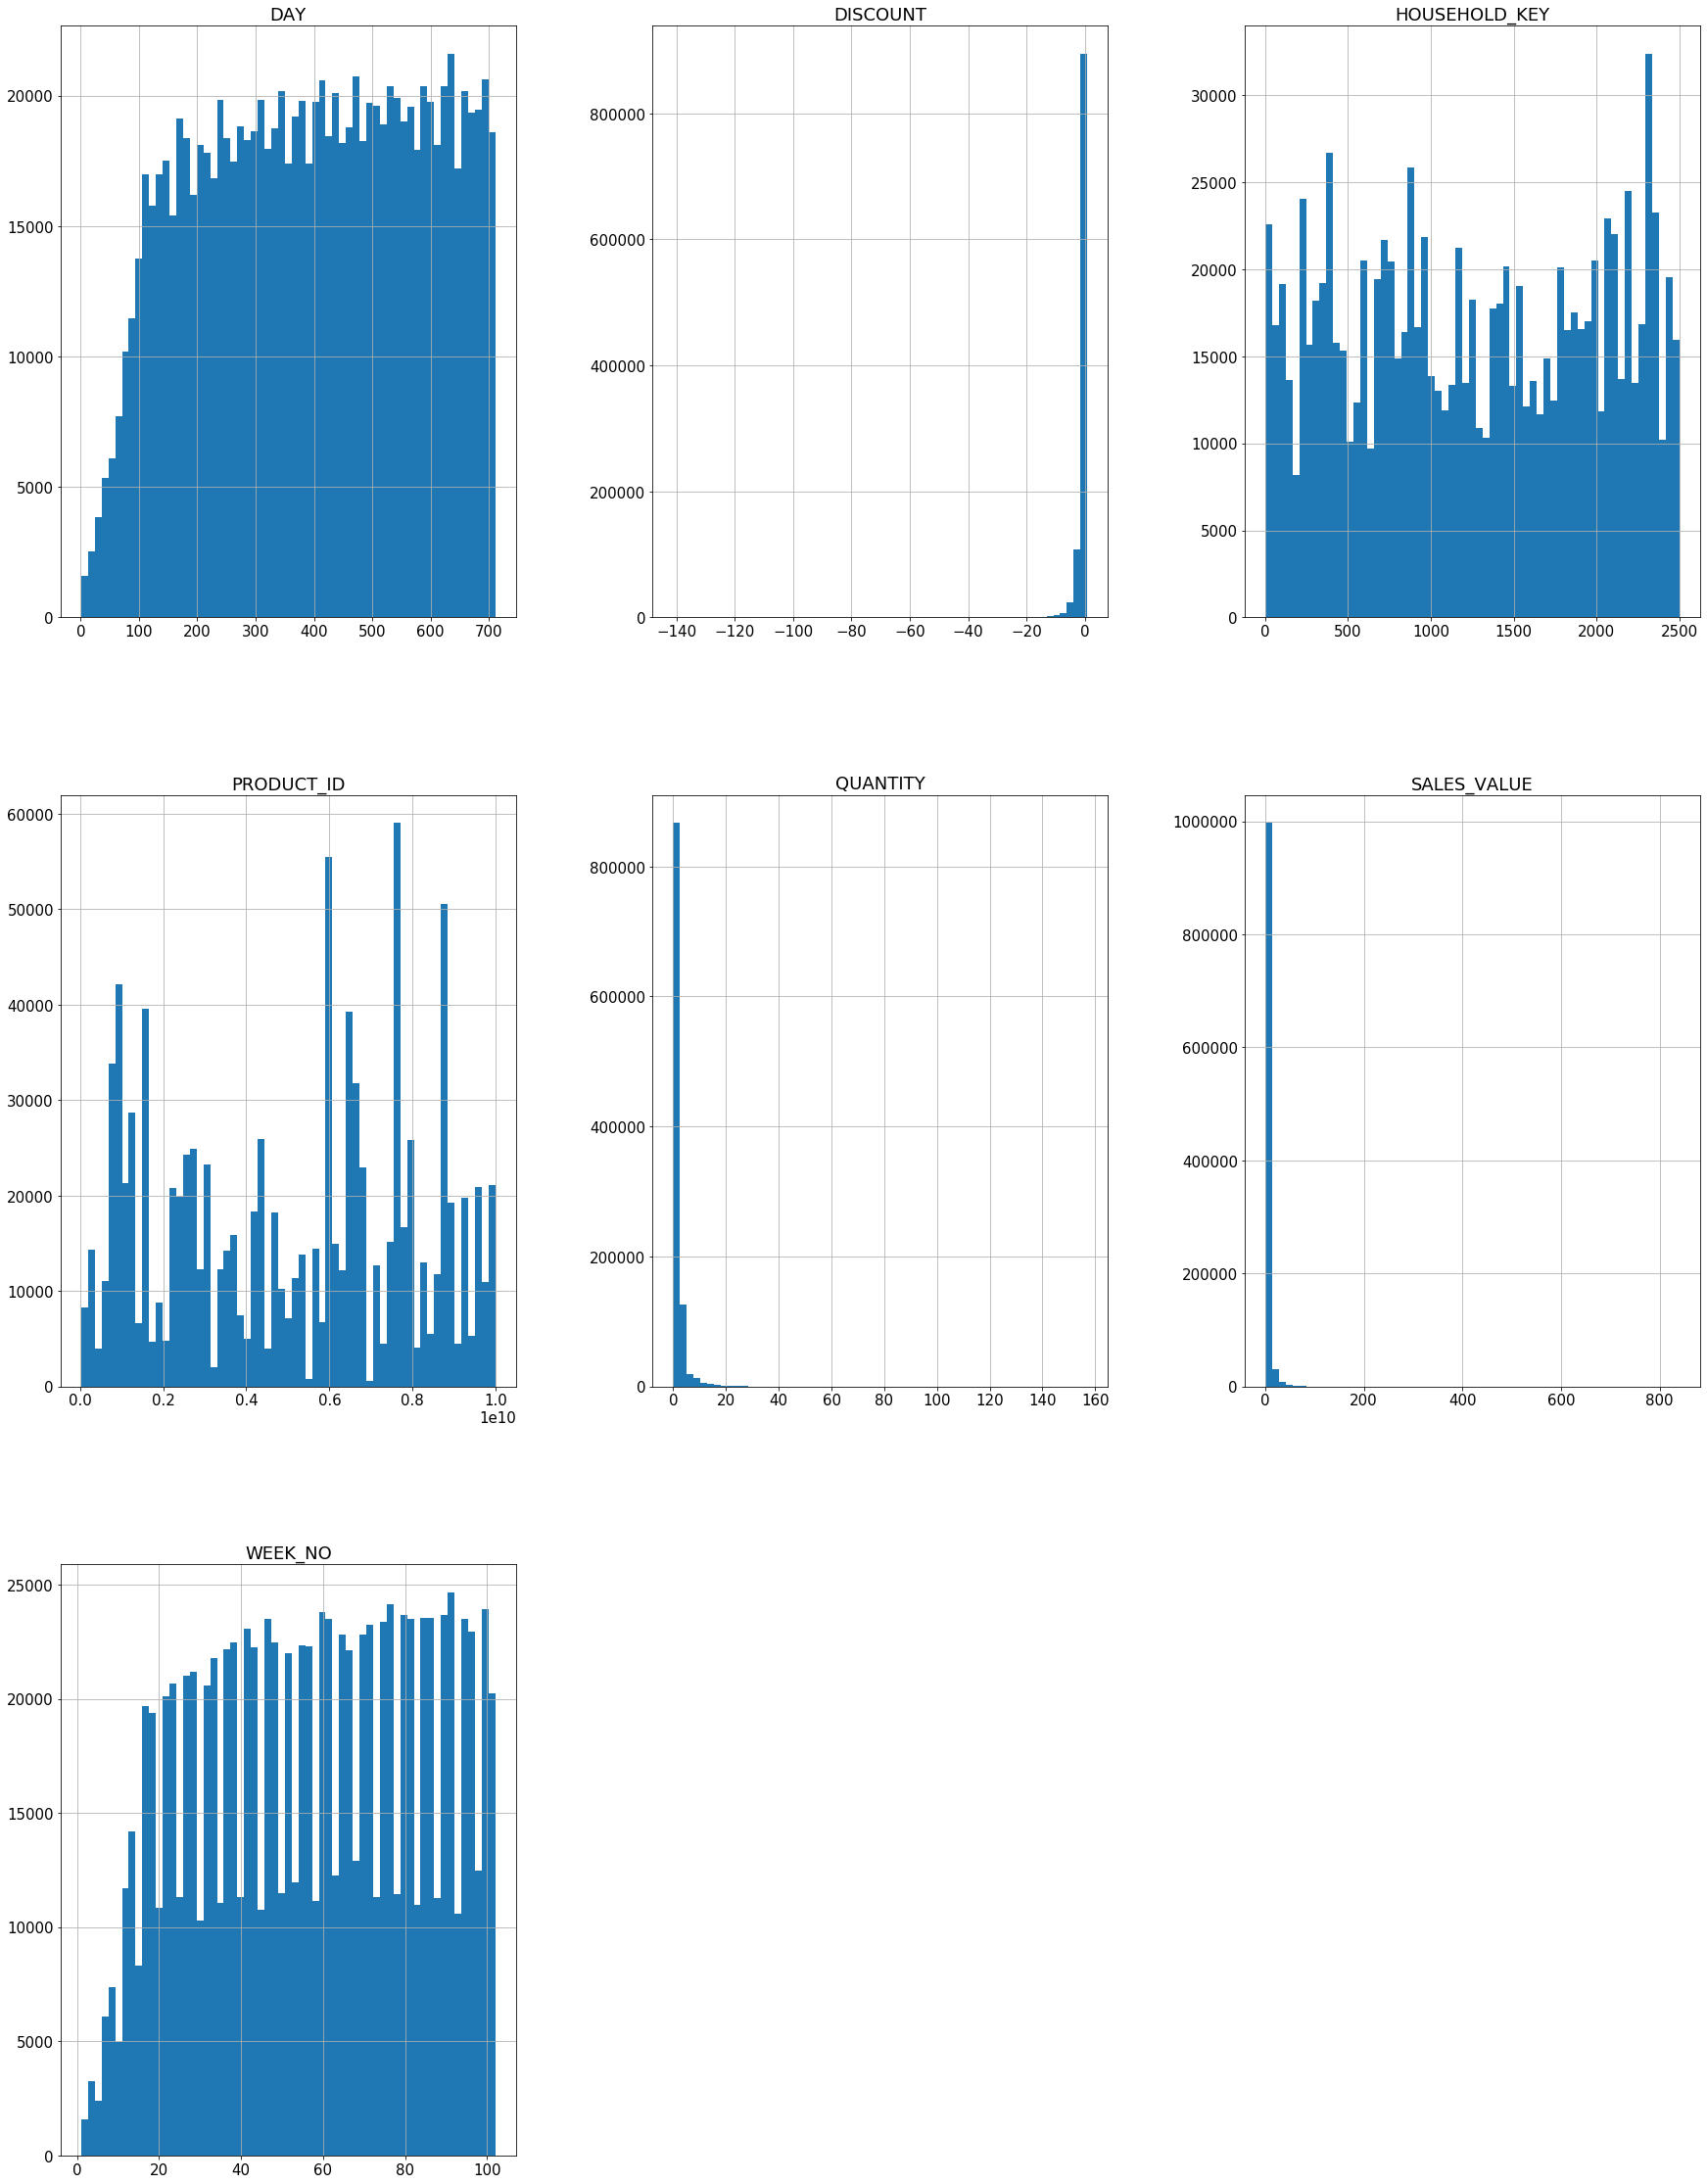

In [41]:
_ = df_transactions.hist(bins=61, figsize=(30,40))

* ### Households are not equally represented. So we need a complete table that we can populate with the information from the dataset


In [95]:

# creating a table that has a row for each week for each household

households = df_transactions['HOUSEHOLD_KEY'].sort_values().unique()
max_week = df_transactions['WEEK_NO'].max()

big_df = pd.DataFrame()

for key in households:
    df = pd.DataFrame()
    df['WEEK_NO'] = np.arange(1,max_week+1)
    df['HOUSEHOLD_KEY'] = key
    
    big_df = pd.concat([big_df,df])

print(big_df.shape)
big_df.head()

(81702, 2)


,WEEK_NO,HOUSEHOLD_KEY
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


* ### "DAY" goes from 1 to 700. Can we get more info on the time of the transaction? E.g. season, month

In [45]:
df_products.head()

,PRODUCT_ID,DEPARTMENT,COMMODITY_DESC
0,3878731104,AUTOMOTIVE,COUPON
1,5617044735,AUTOMOTIVE,NEWSPAPER
2,3333525418,CHARITABLE CONT,UNKNOWN
3,5678132014,CHEF SHOPPE,UNKNOWN
4,6163551664,CNTRL/STORE SUP,COUPON/MISC ITEMS


In [51]:
sorted(df_products['COMMODITY_DESC'].unique())

['(CORP USE ONLY)',
 'ADULT INCONTINENCE',
 'AIR CARE',
 'ANALGESICS',
 'ANTACIDS',
 'APPAREL',
 'APPLES',
 'AUDIO/VIDEO PRODUCTS',
 'AUTOMOTIVE PRODUCTS',
 'BABY FOODS',
 'BABY HBC',
 'BABYFOOD',
 'BACON',
 'BAG SNACKS',
 'BAKED BREAD/BUNS/ROLLS',
 'BAKED SWEET GOODS',
 'BAKERY PARTY TRAYS',
 'BAKING',
 'BAKING MIXES',
 'BAKING NEEDS',
 'BATH',
 'BATH TISSUES',
 'BATTERIES',
 'BEANS - CANNED GLASS & MW',
 'BEEF',
 'BEERS/ALES',
 'BERRIES',
 'BEVERAGE',
 'BIRD SEED',
 'BLEACH',
 'BOOKSTORE',
 'BOTTLE DEPOSITS',
 'BOUQUET (NON ROSE)',
 'BREAD',
 'BREAKFAST SAUSAGE/SANDWICHES',
 'BREAKFAST SWEETS',
 'BROCCOLI/CAULIFLOWER',
 'BROOMS AND MOPS',
 'BULK FOODS',
 'BUTTER',
 'CAKES',
 'CANDLES/ACCESSORIES',
 'CANDY - CHECKLANE',
 'CANDY - PACKAGED',
 'CANNED JUICES',
 'CANNED MILK',
 'CARROTS',
 'CAT FOOD',
 'CAT LITTER',
 'CEREAL/BREAKFAST',
 'CHARCOAL AND LIGHTER FLUID',
 'CHEESE',
 'CHEESES',
 'CHICKEN',
 'CHICKEN/POULTRY',
 'CHIPS&SNACKS',
 'CHRISTMAS  SEASONAL',
 'CIGARETTES',
 'CIGARS',


* ### Aha! 💡There is something called "CHRISTMAS SEASONAL"
Let's search for other seasonal product descriptions

In [57]:
df_products[df_products['COMMODITY_DESC'].str.contains('SEASONAL')]['COMMODITY_DESC'].drop_duplicates()


42          CHRISTMAS  SEASONAL
60     FALL AND WINTER SEASONAL
109      SPRING/SUMMER SEASONAL
326                    SEASONAL
Name: COMMODITY_DESC, dtype: object

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  if __name__ == '__main__':


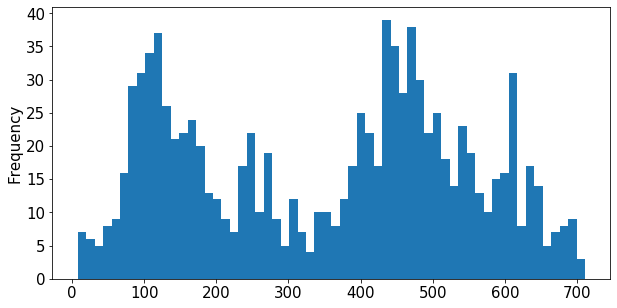

In [63]:
spring_summer_products = df_products[df_products['COMMODITY_DESC']=='SPRING/SUMMER SEASONAL']['PRODUCT_ID'].to_list()
fall_winter_products = df_products[df_products['COMMODITY_DESC']=='FALL AND WINTER SEASONAL']['PRODUCT_ID'].to_list()
christmas_products = df_products[df_products['COMMODITY_DESC'].str.contains('CHRISTMAS')]['PRODUCT_ID'].to_list()

spring_summer = df_transactions[df_transactions['PRODUCT_ID'].isin(spring_summer_products)]
fall_winter = df_transactions[df_transactions['PRODUCT_ID'].isin(fall_winter_products)]
christmas = df_transactions[df_transactions['PRODUCT_ID'].isin(christmas_products)]

spring_summer['DAY'].plot('hist', bins=60, figsize=(10,5))

* ### This gives us a good idea about when spring is and thus we can take a good guess on which month it is.

* ### Additionally, checking when the week number increments, we can find out more about which day of the week a certain transaction takes place.

In [65]:
df_transactions['month'], df_transactions['month_num'] = zip(*df_transactions['DAY'].apply(add_month_names))
df_transactions['weekday'],df_transactions['weekday_num'] = zip(*df_transactions['DAY'].apply(add_week_day_names))
df_transactions['season'] = df_transactions['month'].apply(get_season)
df_transactions.head()

,DAY,WEEK_NO,HOUSEHOLD_KEY,PRODUCT_ID,SALES_VALUE,QUANTITY,DISCOUNT,month,month_num,weekday,weekday_num,season
0,1,1,98,782443249,0.39,1.0,0.00,February,2,Tuesday,2,winter
1,1,1,98,3112548822,3.00,2.0,-0.08,February,2,Tuesday,2,winter
2,1,1,98,6571651611,1.15,4.0,0.00,February,2,Tuesday,2,winter
3,1,1,98,8840487053,1.25,1.0,-0.34,February,2,Tuesday,2,winter
4,1,1,212,782443249,0.65,1.0,0.00,February,2,Tuesday,2,winter


* ### Let's prepare a lookup table where we can find the month and season given a week number

In [66]:
week_month_lookup = df_transactions[['DAY','WEEK_NO','month_num']].drop_duplicates().reset_index().drop('index',axis=1)
week_month_lookup.drop('DAY', axis=1, inplace=True)
week_month_lookup.drop_duplicates(subset=['WEEK_NO'], keep="first", inplace=True)
# note: if a week starts at a month and ends in a different month, we assign it to the month it started in

week_month_season_lookup = week_month_lookup.merge(df_transactions[['WEEK_NO','month_num','month','season']].drop_duplicates(), on=['WEEK_NO','month_num'], how='left')
week_month_season_lookup['year'] = week_month_season_lookup['WEEK_NO'].apply(lambda x: 2018 if x>45 and x<=93 else (2017 if x<=45 else 2019))
print(week_month_season_lookup.shape)
week_month_season_lookup.head(200)


(102, 5)


,WEEK_NO,month_num,month,season,year
0,1,2,February,winter,2017
1,2,2,February,winter,2017
2,3,3,March,spring,2017
3,4,3,March,spring,2017
4,5,3,March,spring,2017
5,6,3,March,spring,2017
6,7,4,April,spring,2017
7,8,4,April,spring,2017
8,9,4,April,spring,2017
9,10,4,April,spring,2017


* ### Let's take a closer look at the product dataset

In [68]:
df_products.head()

,PRODUCT_ID,DEPARTMENT,COMMODITY_DESC
0,3878731104,AUTOMOTIVE,COUPON
1,5617044735,AUTOMOTIVE,NEWSPAPER
2,3333525418,CHARITABLE CONT,UNKNOWN
3,5678132014,CHEF SHOPPE,UNKNOWN
4,6163551664,CNTRL/STORE SUP,COUPON/MISC ITEMS


* ### Maybe we can find commonly bought products

In [92]:
# Tables that shows us out the most popular departments and products
# how many times a family bought from them, normalised

things_families_buy = df_transactions[['HOUSEHOLD_KEY','PRODUCT_ID']].merge(df_products, on='PRODUCT_ID', how='left')
things_families_buy = things_families_buy[['HOUSEHOLD_KEY','DEPARTMENT','COMMODITY_DESC']]
things_families_buy.sort_values(by='HOUSEHOLD_KEY').head()

# finding most popular department
most_popular_department = things_families_buy.drop('HOUSEHOLD_KEY', axis=1).reset_index().drop('index',axis=1)
most_popular_department = most_popular_department.groupby('DEPARTMENT').size().reset_index()
most_popular_department.rename(columns={0:'count'}, inplace=True)
most_popular_department = most_popular_department.sort_values('count', ascending=False)
most_popular_department_list = most_popular_department.head()['DEPARTMENT'].tolist()
most_popular_department_per_family = things_families_buy.groupby(['HOUSEHOLD_KEY','DEPARTMENT']).size().reset_index()
most_popular_department_per_family.rename(columns={0:'count'}, inplace=True)
most_popular_department_per_family_reduced = most_popular_department_per_family[most_popular_department_per_family['DEPARTMENT'].isin(most_popular_department_list)]
popular_department_table = most_popular_department_per_family_reduced.pivot(index='HOUSEHOLD_KEY', columns = 'DEPARTMENT', values='count')
popular_department_table.columns.name = None
popular_department_table.fillna(0, inplace=True)
popular_department_table = popular_department_table.reset_index()

x = popular_department_table.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
values = pd.DataFrame(x_scaled)
values.columns = popular_department_table.columns
values['HOUSEHOLD_KEY'] = popular_department_table['HOUSEHOLD_KEY']
popular_department_table = values.copy()

# finding most popular products
most_popular_commodity = things_families_buy.drop('HOUSEHOLD_KEY', axis=1).reset_index().drop('index',axis=1)
most_popular_commodity = most_popular_commodity.groupby('COMMODITY_DESC').size().reset_index()
most_popular_commodity.rename(columns={0:'count'}, inplace=True)
most_popular_commodity = most_popular_commodity.sort_values('count', ascending=False)
most_popular_commodity_list = most_popular_commodity.head()['COMMODITY_DESC'].tolist()
most_popular_commodity_per_family = things_families_buy.groupby(['HOUSEHOLD_KEY','COMMODITY_DESC']).size().reset_index()
most_popular_commodity_per_family.rename(columns={0:'count'}, inplace=True)
most_popular_commodity_per_family_reduced = most_popular_commodity_per_family[most_popular_commodity_per_family['COMMODITY_DESC'].isin(most_popular_commodity_list)]
popular_commodity_table = most_popular_commodity_per_family_reduced.pivot(index='HOUSEHOLD_KEY', columns = 'COMMODITY_DESC', values='count')
popular_commodity_table.columns.name = None
popular_commodity_table.fillna(0, inplace=True)
popular_commodity_table = popular_commodity_table.reset_index()

x = popular_commodity_table.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
values = pd.DataFrame(x_scaled)
values.columns = popular_commodity_table.columns
values['HOUSEHOLD_KEY'] = popular_commodity_table['HOUSEHOLD_KEY']
popular_commodity_table = values.copy()

print(popular_department_table.head())
popular_commodity_table.head()


   HOUSEHOLD_KEY   DRUG GM   GROCERY      MEAT  MEAT-PCKGD   PRODUCE
0              1  0.141615  0.270451  0.016949    0.352713  0.147233
1              7  0.135404  0.169252  0.148305    0.089147  0.112648
2              8  0.176398  0.266220  0.220339    0.248062  0.142292
3             13  0.352795  0.342031  0.004237    0.286822  0.104743
4             16  0.031056  0.075458  0.063559    0.065891  0.038538


,HOUSEHOLD_KEY,BAG SNACKS,BAKED BREAD/BUNS/ROLLS,CHEESE,FLUID MILK PRODUCTS,SOFT DRINKS
0,1,0.231183,0.322751,0.253333,0.229885,0.090062
1,7,0.096774,0.142857,0.153333,0.132184,0.037267
2,8,0.096774,0.232804,0.280000,0.241379,0.090062
3,13,0.166667,0.185185,0.286667,0.586207,0.102484
4,16,0.053763,0.359788,0.033333,0.258621,0.015528


# 4. Fitting a preliminary model <a class="anchor" id="train_first"></a>

* ### Before fitting a model, we need to aggregate the data to represent weekly behaviour

In [145]:
transactions_weekly_aggregated = df_transactions.groupby(["HOUSEHOLD_KEY", "WEEK_NO"])[["SALES_VALUE",'QUANTITY','DISCOUNT']].sum().reset_index()
transactions_weekly_aggregated = transactions_weekly_aggregated.sort_values(by=['HOUSEHOLD_KEY','WEEK_NO']).reset_index().drop('index', axis=1)
start_df = big_df.merge(transactions_weekly_aggregated, on=['HOUSEHOLD_KEY','WEEK_NO'], how='left')
start_df = start_df.fillna(0)
print(start_df.shape)
start_df.head()


(81702, 5)


,WEEK_NO,HOUSEHOLD_KEY,SALES_VALUE,QUANTITY,DISCOUNT
0,1,1,0.0,0.0,0.0
1,2,1,0.0,0.0,0.0
2,3,1,0.0,0.0,0.0
3,4,1,0.0,0.0,0.0
4,5,1,0.0,0.0,0.0


* ### Bring in the time information and the popular products information

In [159]:
# Merge everything together

a = start_df.merge(week_month_season_lookup, on='WEEK_NO', how='left')
c = a.merge(popular_department_table, on='HOUSEHOLD_KEY', how='left')
f = c.merge(popular_commodity_table, on='HOUSEHOLD_KEY', how='left')
all_data = f.copy()
all_data.head()

,WEEK_NO,HOUSEHOLD_KEY,SALES_VALUE,QUANTITY,DISCOUNT,month_num,month,season,year,DRUG GM,GROCERY,MEAT,MEAT-PCKGD,PRODUCE,BAG SNACKS,BAKED BREAD/BUNS/ROLLS,CHEESE,FLUID MILK PRODUCTS,SOFT DRINKS
0,1,1,0.0,0.0,0.0,2,February,winter,2017,0.141615,0.270451,0.016949,0.352713,0.147233,0.231183,0.322751,0.253333,0.229885,0.090062
1,2,1,0.0,0.0,0.0,2,February,winter,2017,0.141615,0.270451,0.016949,0.352713,0.147233,0.231183,0.322751,0.253333,0.229885,0.090062
2,3,1,0.0,0.0,0.0,3,March,spring,2017,0.141615,0.270451,0.016949,0.352713,0.147233,0.231183,0.322751,0.253333,0.229885,0.090062
3,4,1,0.0,0.0,0.0,3,March,spring,2017,0.141615,0.270451,0.016949,0.352713,0.147233,0.231183,0.322751,0.253333,0.229885,0.090062
4,5,1,0.0,0.0,0.0,3,March,spring,2017,0.141615,0.270451,0.016949,0.352713,0.147233,0.231183,0.322751,0.253333,0.229885,0.090062


* ### Select the columns

In [160]:
training_columns = ['QUANTITY', 
                 'DISCOUNT',

                 'month_num',
                 'month',
                 'season',

                 'DRUG GM', 
                 'GROCERY', 
                 'MEAT',
                 'MEAT-PCKGD', 
                 'PRODUCE', 
                 'BAG SNACKS', 
                 'BAKED BREAD/BUNS/ROLLS',
                 'CHEESE', 
                 'FLUID MILK PRODUCTS',
                 'SOFT DRINKS', 

                 'SALES_VALUE']

columns_to_predict_on = [x for x in all_columns if x != 'SALES_VALUE']

training_data = all_data[training_columns]
training_data.dropna(inplace=True)


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


* ### Separate the training and test data

In [161]:
X = training_data[columns_to_predict_on]
X = pd.get_dummies(X)
print('Amount of all data: ' +str(X.shape[0]))

y = training_data['SALES_VALUE']

# option 1 - temporal split
total_data_amount = X.shape[0]
training_amount = int(total_data_amount*0.8)

X_train = X[:training_amount]
y_train = y[:training_amount]
X_test = X[training_amount:]
y_test = y[training_amount:]

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

print('Amount of training data: ' + str(X_train.shape[0]))
print('Amount of test data: ' + str(X_test.shape[0]))

Amount of all data: 81702
Amount of training data: 65361
Amount of test data: 16341


* ### Let's train our model

In [162]:
param = {'max_depth':5, 'eta':0.7, 'booster':'gbtree', 'subsample':0.5,
         'objective':'reg:squarederror','eval_metric':'rmse'}
evallist = [(dtest, 'eval'), (dtrain, 'train')]
num_round = 15
bst = xgb.train(param, dtrain, num_round, evallist)


[0]	eval-rmse:37.3614	train-rmse:33.685
[1]	eval-rmse:26.5247	train-rmse:22.9025
[2]	eval-rmse:24.9553	train-rmse:21.1822
[3]	eval-rmse:25.0052	train-rmse:20.4726
[4]	eval-rmse:25.1566	train-rmse:20.2122
[5]	eval-rmse:25.208	train-rmse:19.9297
[6]	eval-rmse:24.9306	train-rmse:19.8474
[7]	eval-rmse:25.0145	train-rmse:19.6377
[8]	eval-rmse:25.1024	train-rmse:19.5107
[9]	eval-rmse:25.0247	train-rmse:19.3217
[10]	eval-rmse:25.2665	train-rmse:19.113
[11]	eval-rmse:25.2558	train-rmse:18.9876
[12]	eval-rmse:25.4679	train-rmse:18.9114
[13]	eval-rmse:25.6709	train-rmse:18.7028
[14]	eval-rmse:25.7842	train-rmse:18.6034


* ### Evaluation metrics

In [163]:
preds = bst.predict(dtest)
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
rmse = math.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, preds)
r2 = r2_score(y_test, preds) 

print('mean absolute error: ' + str(mae))
print('mean squared error: ' + str(mse))
print('root mean squared error: ' + str(rmse))
print('mean absolute percentage error: ' + str(rmse))
print('R2: ' + str(r2))

mean absolute error: 14.295285762643783
mean squared error: 664.8296925196771
root mean squared error: 25.78429158460005
mean absolute percentage error: 25.78429158460005
R2: 0.8825770448083802


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


### Looks pretty good! Let's see which feature helps us predict the sales amunt this well.

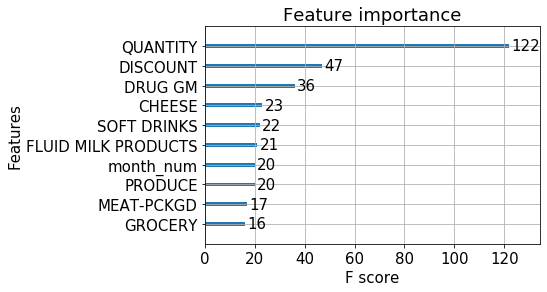

In [164]:
matplotlib.rcParams.update({'font.size': 15})
xgb.plot_importance(bst,max_num_features=10)

### Oops. We might have made a mistake! 😅

In [165]:
# fix leakage problem
all_data_after_leakage = all_data.copy()

#1
all_data_after_leakage['QUANTITY'] = all_data_after_leakage.sort_values('WEEK_NO').groupby('HOUSEHOLD_KEY')['QUANTITY'].shift(1)

# #2
all_data_after_leakage['DISCOUNT'] = all_data_after_leakage.sort_values('WEEK_NO').groupby('HOUSEHOLD_KEY')['DISCOUNT'].shift(1)

training_data = all_data_after_leakage[all_columns]
training_data.isna().sum()
training_data.dropna(inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


* ### Let's try it again

In [167]:
X = training_data[columns_to_predict_on]
X = pd.get_dummies(X)
print(X.shape)

y = training_data['SALES_VALUE']

# option 1 - temporal split
total_data = X.shape[0]
training_amount = int(total_data*0.8)

X_train = X[:training_amount]
y_train = y[:training_amount]
X_test = X[training_amount:]
y_test = y[training_amount:]

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

param = {'max_depth':5, 'eta':0.7, 'booster':'gbtree', 'subsample':0.5,
         'objective':'reg:squarederror','eval_metric':'rmse'}
evallist = [(dtest, 'eval'), (dtrain, 'train')]
num_round = 15
bst = xgb.train(param, dtrain, num_round, evallist)


/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[0]	eval-rmse:69.4974	train-rmse:60.7446
[1]	eval-rmse:65.6283	train-rmse:57.2468
[2]	eval-rmse:65.5652	train-rmse:56.5843
[3]	eval-rmse:65.2861	train-rmse:56.3213
[4]	eval-rmse:65.8731	train-rmse:56.1582
[5]	eval-rmse:65.809	train-rmse:56.0397
[6]	eval-rmse:66.2861	train-rmse:55.8117
[7]	eval-rmse:66.296	train-rmse:55.6661
[8]	eval-rmse:66.3167	train-rmse:55.5737
[9]	eval-rmse:66.4708	train-rmse:55.43
[10]	eval-rmse:66.9912	train-rmse:55.3209
[11]	eval-rmse:66.7944	train-rmse:55.2085
[12]	eval-rmse:66.6613	train-rmse:55.1707
[13]	eval-rmse:66.6554	train-rmse:55.0542
[14]	eval-rmse:66.8179	train-rmse:54.957


In [168]:

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

preds = bst.predict(dtest)
mae = mean_absolute_error(y_test, preds)
print('mean absolute error: ' + str(mae))

mse = mean_squared_error(y_test, preds)
rmse = math.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, preds)
print('mean squared error: ' + str(mse))
print('root mean squared error: ' + str(rmse))
print('mean absolute percentage error: ' + str(rmse))

r2 = r2_score(y_test, preds) 
print('R2: ' + str(r2))

mean absolute error: 46.68925428558365
mean squared error: 4464.625387008932
root mean squared error: 66.81785230766499
mean absolute percentage error: 66.81785230766499
R2: 0.21410884392426122


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


* ### We have a model to be improved!

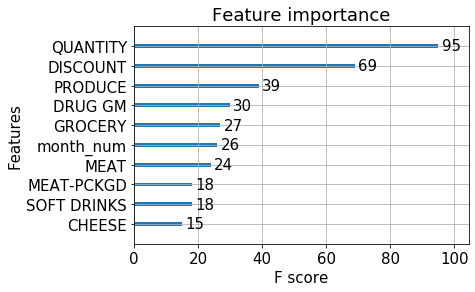

In [169]:
matplotlib.rcParams.update({'font.size': 15})
xgb.plot_importance(bst,max_num_features=10)

# 5. Feature Engineering <a class="anchor" id="feature_engineering"></a>
[jump to end of this part](#bring_together)

# 6. Bring everything together <a class="anchor" id="bring_together"></a>

# 7.1. Overfit <a class="anchor" id="overfit"></a>

# 7.2. Normal fit model <a class="anchor" id="normal_model"></a>